In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [14]:
# label = "small"
# serial_time = 0.400825
# serial_energy = 31.1517
# farm_optim = pd.read_csv("ferret/small/benchmark-gcc-ff-55-farm-optim.out")
# farm = pd.read_csv("ferret/small/benchmark-gcc-ff-55-farm.out")
# farmofpipes = pd.read_csv("ferret/small/benchmark-gcc-ff-55-farmofpipes.out")
# pipeoffarms = pd.read_csv("ferret/small/benchmark-gcc-ff-55-pipeoffarms.out")

# label = "medium"
# serial_time = 1.23999
# serial_energy = 108.776
# farm_optim = pd.read_csv("ferret/medium/benchmark-gcc-ff-55-farm-optim.out")
# farm = pd.read_csv("ferret/medium/benchmark-gcc-ff-55-farm.out")
# farmofpipes = pd.read_csv("ferret/medium/benchmark-gcc-ff-55-farmofpipes.out")
# pipeoffarms = pd.read_csv("ferret/medium/benchmark-gcc-ff-55-pipeoffarms.out")

# label = "large"
# serial_time = 5.22095
# serial_energy = 569.397
# farm_optim = pd.read_csv("ferret/large/benchmark-gcc-ff-55-farm-optim.out")
# farm = pd.read_csv("ferret/large/benchmark-gcc-ff-55-farm.out")
# farmofpipes = pd.read_csv("ferret/large/benchmark-gcc-ff-55-farmofpipes.out")
# pipeoffarms = pd.read_csv("ferret/large/benchmark-gcc-ff-55-pipeoffarms.out")

label = "native"
serial_time = 357.017
serial_energy = 39274.6
farm_optim = pd.read_csv("ferret/native/benchmark-gcc-ff-55-farm-optim.out")
farm = pd.read_csv("ferret/native/benchmark-gcc-ff-55-farm.out")
farmofpipes = pd.read_csv("ferret/native/benchmark-gcc-ff-55-farmofpipes.out")
pipeoffarms = pd.read_csv("ferret/native/benchmark-gcc-ff-55-pipeoffarms.out")


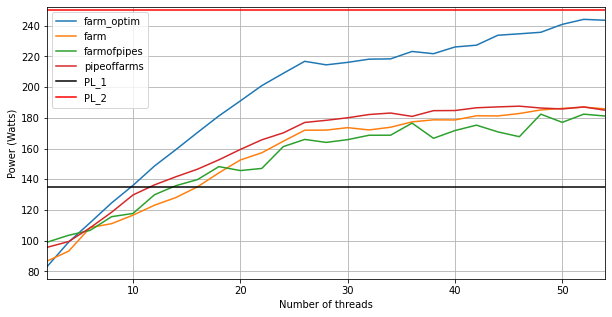

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(farm_optim.Threads,farm_optim.JoulesCpuAll/ farm_optim.Time,label = "farm_optim")
plt.plot(farm.Threads,farm.JoulesCpuAll/ farm.Time,label = "farm")
plt.plot(farmofpipes.Threads,farmofpipes.JoulesCpuAll/ farmofpipes.Time,label = "farmofpipes")
plt.plot(pipeoffarms.Threads,pipeoffarms.JoulesCpuAll/ pipeoffarms.Time,label = "pipeoffarms")
plt.axhline(y=135, color='black', linestyle='-', label="PL_1")
plt.xlim([2,54])
plt.axhline(y=250, color='r', linestyle='-', label="PL_2")
plt.xlabel("Number of threads")
plt.ylabel("Power (Watts)")
plt.grid()
plt.legend()
plt.savefig('ferret_'+label+'_power')
plt.show()

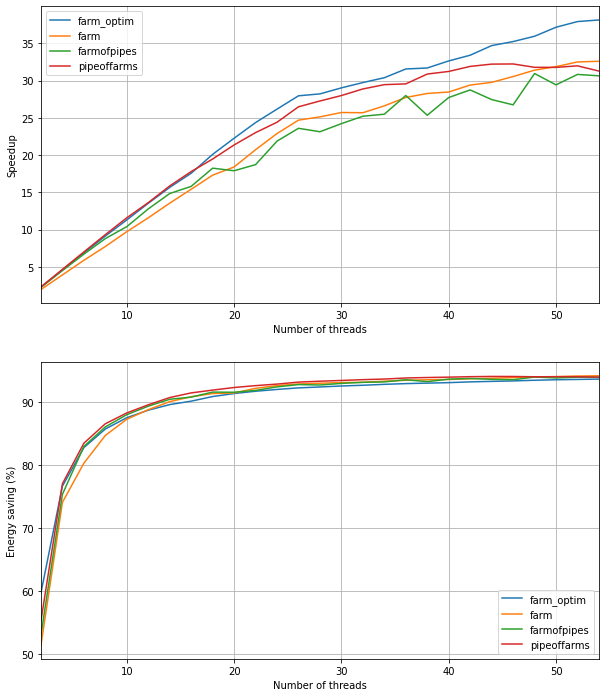

In [16]:
fig, ax = plt.subplots(2,figsize=(10, 12))

ax[0].plot(farm_optim.Threads, serial_time / farm_optim.Time,label = "farm_optim")
ax[0].plot(farm.Threads, serial_time / farm.Time,label = "farm")
ax[0].plot(farmofpipes.Threads, serial_time / farmofpipes.Time,label = "farmofpipes")
ax[0].plot(pipeoffarms.Threads, serial_time / pipeoffarms.Time,label = "pipeoffarms")
ax[0].set_xlabel("Number of threads")
ax[0].set_ylabel("Speedup")
ax[0].set_xlim([2,54])
ax[0].grid()
ax[0].legend()

ax[1].plot(farm_optim.Threads, (serial_energy - farm_optim.PCM_energy) / serial_energy *100,label = "farm_optim")
ax[1].plot(farm.Threads, (serial_energy - farm.PCM_energy) / serial_energy *100, label = "farm")
ax[1].plot(farmofpipes.Threads, (serial_energy - farmofpipes.PCM_energy) / serial_energy *100, label = "farmofpipes")
ax[1].plot(pipeoffarms.Threads, (serial_energy - pipeoffarms.PCM_energy) / serial_energy *100, label = "pipeoffarms")
ax[1].set_xlabel("Number of threads")
ax[1].set_ylabel("Energy saving (%)")
ax[1].set_xlim([2,54])
ax[1].grid()
ax[1].legend()

fig.savefig('ferret_'+label+'_overall')

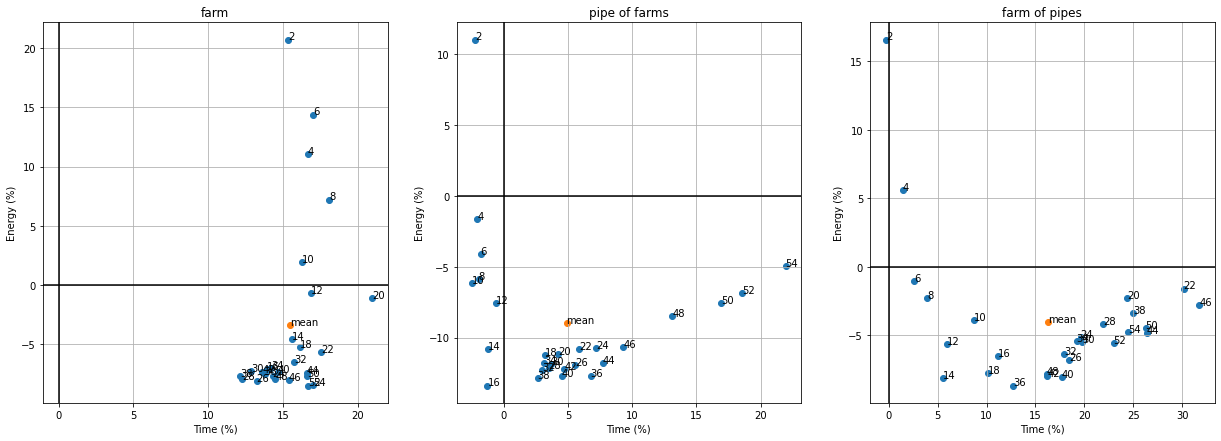

In [18]:
fig, ax = plt.subplots(1,3,figsize=(21, 7))

farm_vs_farm_optim = (farm - farm_optim) / farm_optim * 100
farm_vs_farm_optim[["Time", "PCM_energy"]].to_csv("temp_data", sep='\t')
ax[0].scatter(farm_vs_farm_optim.Time, farm_vs_farm_optim.PCM_energy)
ax[0].scatter(farm_vs_farm_optim.Time.mean(), farm_vs_farm_optim.PCM_energy.mean())
ax[0].annotate("mean",(farm_vs_farm_optim.Time.mean(), farm_vs_farm_optim.PCM_energy.mean()))
ax[0].axhline(0, color='black')
ax[0].axvline(0, color='black')
ax[0].set_xlabel('Time (%)')
ax[0].set_ylabel('Energy (%)')
ax[0].grid()
ax[0].set_title('farm')

for i in range(27):
    ax[0].annotate(farm.Threads[i], (farm_vs_farm_optim.Time[i], farm_vs_farm_optim.PCM_energy[i]))
    

farm_vs_pipeoffarms = (pipeoffarms - farm_optim) / farm_optim * 100
farm_vs_pipeoffarms[["Time", "PCM_energy"]].to_csv("temp_data", sep='\t')
ax[1].scatter(farm_vs_pipeoffarms.Time, farm_vs_pipeoffarms.PCM_energy)
ax[1].scatter(farm_vs_pipeoffarms.Time.mean(), farm_vs_pipeoffarms.PCM_energy.mean())
ax[1].annotate("mean",(farm_vs_pipeoffarms.Time.mean(), farm_vs_pipeoffarms.PCM_energy.mean()))
ax[1].axhline(0, color='black')
ax[1].axvline(0, color='black')
ax[1].set_xlabel('Time (%)')
ax[1].set_ylabel('Energy (%)')
ax[1].grid()
ax[1].set_title('pipe of farms')

for i in range(27):
    ax[1].annotate(farm.Threads[i], (farm_vs_pipeoffarms.Time[i], farm_vs_pipeoffarms.PCM_energy[i]))
    
    
farm_vs_farmofpipes = (farmofpipes - farm_optim) / farm_optim * 100
farm_vs_farmofpipes[["Time", "PCM_energy"]].to_csv("temp_data", sep='\t')
ax[2].scatter(farm_vs_farmofpipes.Time, farm_vs_farmofpipes.PCM_energy)
ax[2].scatter(farm_vs_farmofpipes.Time.mean(), farm_vs_farmofpipes.PCM_energy.mean())
ax[2].annotate("mean",(farm_vs_farmofpipes.Time.mean(), farm_vs_farmofpipes.PCM_energy.mean()))
ax[2].axhline(0, color='black')
ax[2].axvline(0, color='black')
ax[2].set_xlabel('Time (%)')
ax[2].set_ylabel('Energy (%)')
ax[2].grid()
ax[2].set_title('farm of pipes')

for i in range(27):
    ax[2].annotate(farm.Threads[i], (farm_vs_farmofpipes.Time[i], farm_vs_farmofpipes.PCM_energy[i]))

fig.savefig('ferret_comparison')